# 퍼셉트론

- 왜 배워야 하는가? : 딥러닝의 기원

# 2.1 퍼셉트론이란?

- 퍼셉트론 : 다수의 신호를 입력으로 받아 하나의 신호를 출력합니다. 여기서 말하는 신호란 전류나 강물처럼 흐름이 있는 것을 상상하면 좋습니다. 

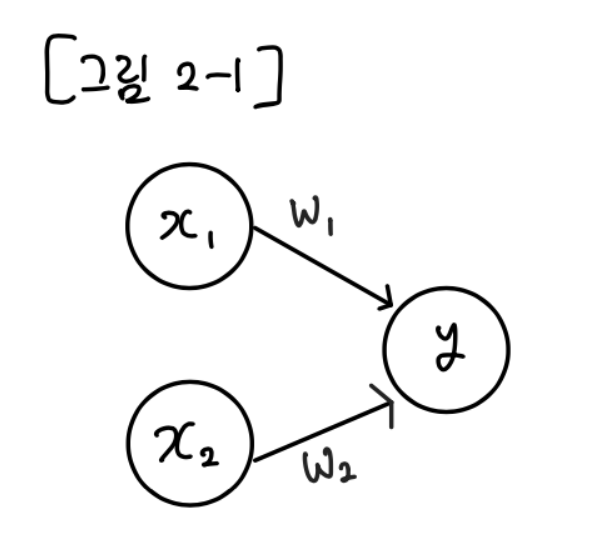

- x1과 x2는 입력신호, y는 출력신호, w1,w2는 각각의 가중치를 뜻합니다.
- 그림의 원을 뉴런(노드)라고 부릅니다. 
- 입력 신호(여기서 x1,x2)가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해집니다.(w1x1,w2x2)
- 뉴런이 활성화가 되면, 즉 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력합니다. 
- 그 한계를 임계값이라고 하며, 세타라 표기합니다.

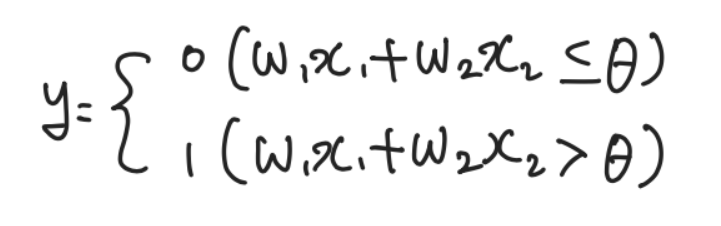
- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여합니다. 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용합니다. 
- 즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻합니다.

### 참고
- 가중치의 의미? 

- - 가중치는 전류에서 말하는 저항에 해당합니다. 저항은 전류의 흐름을 억제하는 매개변수로, 저항이 낮을수록 큰 전류가 흐르빈다. 한편 퍼셉트론의 가중치는 그 값이 클수록 강한 신호를 흘려보냅니다. 이처럼 서로 작용하는 방향은 반대지만, 신호가 얼마나 잘(혹은 어렵게)흐르는가를 통제하는 점에서 저항과 가중치는 같은 기능을 합니다.

# 2.2 단순한 논리회로

- AND 게이트
    - 입력 2, 출력 1개 
    - 두 입력이 모두 1일 떄만 1을 출력, 그 외에는 0을 출력합니다.
    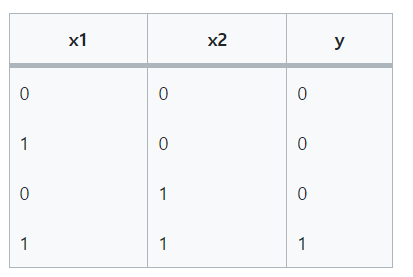
    

- NAND 게이트와 OR 게이트
    - NAND 게이트(Not AND)
    - AND 게이트의 출력을 뒤집으면 된다. 
    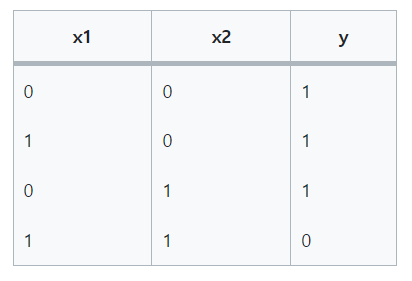
    
    
    - OR 게이트 
    - 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로 입니다.
    - 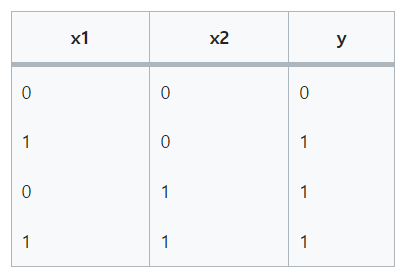
    
#### 여기서 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 인간입니다. 기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 합니다. 학습이란, 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 합니다. 

#### 퍼셉트론의 AND,NAND,OR 논리 회로를 표현할 수 있음을 알았습니다. 여기서 중요한 점은 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두 똑같다는 것이빈다. 세 가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값뿐입니다. 



In [7]:
# 퍼셉트론 구현하기

def AND(x1,x2):
    w1,w2, theta = 0.5,0.5,0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta :
        return 0
    elif tmp > theta :
        return 1

In [9]:
# 출력하기
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


# 가중치와 편향 도입

- 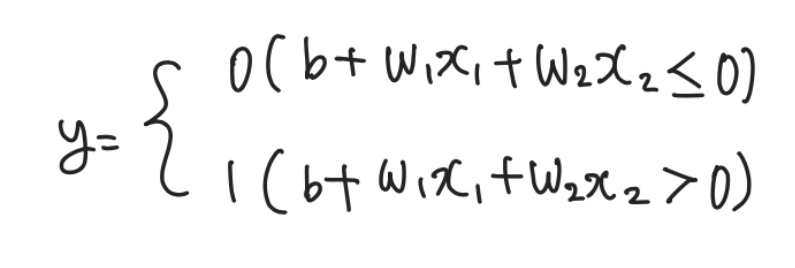

- theta 값은 -b로 치환하면 위 식과 같습니다.
- 여기서 b는 편향(bias)이라 하며 w1과 w2는 그대로 가중치 입니다. 
- 퍼셉트론은 입력 신호에 가중치는 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력합니다.

In [10]:
# 넘파이를 사용한 퍼셉트론 구현 

import numpy as np
x = np.array([0,1]) # 입력
w = np.array([0.5,0.5]) # 가중치
b = -0.7

w*x

array([0. , 0.5])

In [11]:
np.sum(w*x)

0.5

In [12]:
np.sum(w*x) + b

-0.19999999999999996

In [13]:
# 넘파이를 사용한 AND 게이트 구현

def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0 :
        return 0 
    else : # tmp > 0
        return 1    

In [16]:
AND(0,0)

0

- 편향의 값은 뉴런이 얼마나 쉽게 활성화 되는지 결정합니다.
- 한편, w1,w2는 가중치로 b는 편향으로 서로 구별하기도 하지만 셋 모두 가중치라 할 때도 있습니다.

# NAND 게이트와 OR 게이트를 구현

In [17]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1
    
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0 :
        return 0
    else:
        return 1
    
# 앞 절에서 AND, NAND, OR는 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개변수의 값뿐이라 했습니다. 실제로 파이썬으로 작성한 NAND
# OR 게이트 코드에서도 AND와 다른 곳은 가중치와 편향 값을 설정하는 부분뿐입니다

# 퍼셉트론의 한계

# XOR 게이트
- XOR 게이트는 배타적 논리합이라는 논리 회로 입니다. 
- x1과 x2 중 한쪽이 1 일때만 1을 출력합니다.
- XOR 게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정해야하는지 알아야합니다.

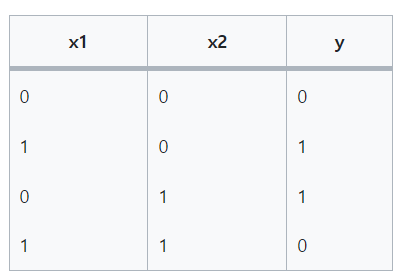

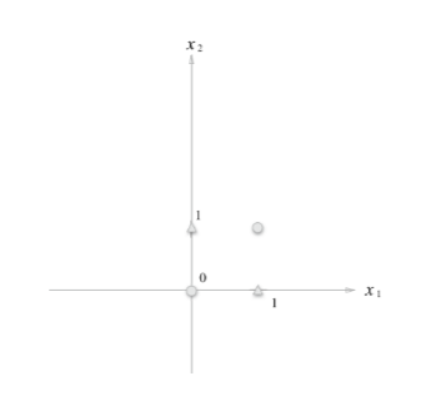

- 원과 삼각형은 XOR게이트 출력을 나타낸다. 직선 하나로 원과 삼각형을 나누는 영역을 만들 수 있을까?

# 선형과 비선형 
- 직선이라면 제약을 없앤다면 ??
- 선형적인 모습 말고 비선형으로 아래와 같이 나타낸다면 가능합니다.

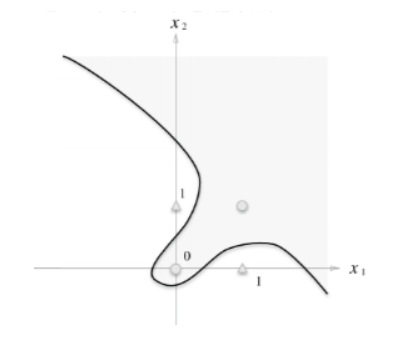

# 다층 퍼셉트론이 충돌한다면??

- 사실 퍼셉트론은 층을 더 쌓아 '다층 퍼셉트론'으로 만들 수 있습니다.
- 층을 하나 더 쌓아서 다층 퍼셉트론으로 XOR 게이트를 구현하겠습니다.

## 기존 게이트 조합하기 
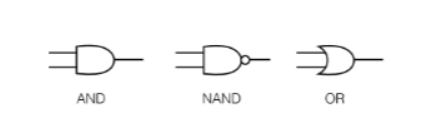

이 게이트 기호들을 통해 층을 하나 더 쌓아서 

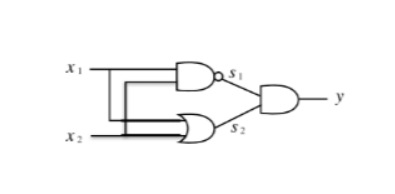

그럼 아래와 같은 진리표를 만들 수 있습니다.

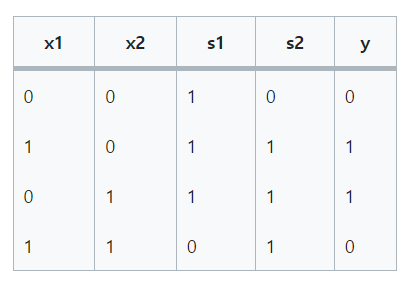

In [20]:
# XOR 게이트 구현하기

def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


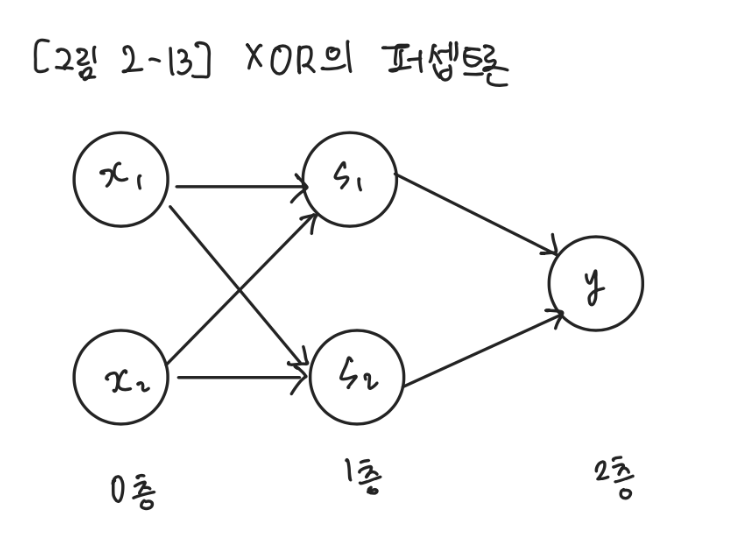

- 왼쪽부터 0층, 1층, 2층이라고 부르겠습니다! 
- 실제로 AND, OR가 단층 퍼셉트론인 데 반해, XOR는 2층 퍼셉트론입니다. 이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라고 합니다.
- 실제로 층을 늘려 표현하지 못하는 XOR 게이트를 표현하였습니다! 

# NAND에서 컴퓨터까지

- 사실은 NAND 게이트의 조합만으로 컴퓨터가 수행하는 일을 재현할 수 있습니다.

### 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 '가중치'와 '편항'을 매개변수로 설정한다.
- 퍼셉트론으로 AND, OR 게이트 등의 논리회로를 표현할 수 있다.
- XOR 게이트는 단층퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있지만, 층을 쌓아 다층 퍼셉트론으로는 비선형 영역도 표현이 가능하다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.